In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from models import SEM, LinearDynamicSystem, KerasMultiLayerPerceptron, KerasSimpleRNN

np.random.seed(345013)
sns.set_context('talk', font_scale=1.5)

Using TensorFlow backend.


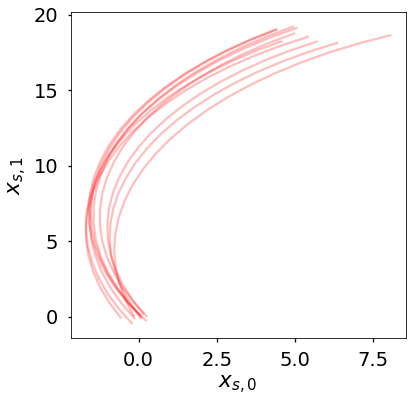

In [10]:
A = np.array([[-.5, -2], [2, -.2]])
A = np.random.randn(2, 2)

x0 = np.random.rand(2)
def rotate_matrix(theta):
    theta = theta /(180./np.pi)  # convert to radians
    W = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return W

def lds_update(x, b, W):
    return b + np.matmul(x, W)

n_samples = 10
x = []
fig = plt.figure(figsize=(6, 6))
for _ in range(n_samples):
    x0 = []
    x0.append(np.random.randn(2)*0.2)
    theta = 4.0 + np.random.randn() * 1.0
    b = np.array([-0.4, 1]) + np.random.randn(2) * 0.05
    for ii in range(20):
        x0.append(lds_update(x0[-1], b, rotate_matrix(4)))
        
    x0 = np.array(x0)
    plt.plot(x0[:, 0], x0[:, 1], 'r', alpha=0.25)
    x.append(x0)

plt.xlabel(r'$x_{s,0}$')
plt.ylabel(r'$x_{s,1}$')
# plt.title('Rotation Traces')

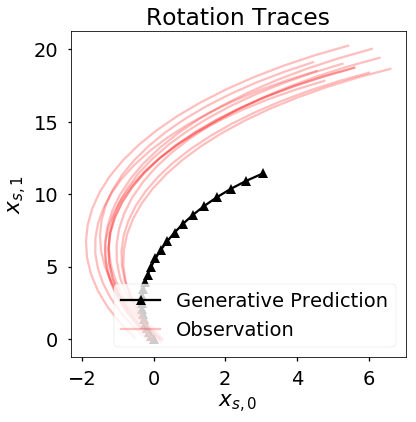

In [9]:
# train an event model (A Linear Dynamical System)
e = LinearDynamicSystem(D=2, eta=0.01)
from tqdm import tqdm_notebook

for x_samp in tqdm_notebook(x, total=n_samples):
    e.new_cluster()
    e.update_f0(x_samp[0, :])
    for ii in range(1, x_samp.shape[0] - 1):
        _x = x_samp[ii, :]
        _y = x_samp[ii+1, :]
        e.update(_x, _y)

        
# run the model generatively for each event
n_run = 25 # arbitray duration of the event to simluate
generative_samples = dict()

x0 = [np.reshape(e.predict_f0(), (1, 2))]
for t in range(1, n_run):
    x_ = np.concatenate(x0)[t-1, :]
    x0.append(e.predict_next(x_).reshape(1, 2))
x0 = np.array(x0).reshape(-1, 2)

#plot the generative sweep
fig = plt.figure(figsize=(6, 6))
h0 = plt.plot(x0[:, 0], x0[:, 1], '^-', color='k', label='Generative Prediction')[0]

# plot the original LDS 
for x0  in x:
    plt.plot(x0[:, 0], x0[:, 1], 'r', alpha=0.25)
h1 = plt.plot(x0[:, 0], x0[:, 1], 'r', alpha=0.25, label='Observation')[0]
handles = [h0, h1]


plt.xlabel(r'$x_{s,0}$')
plt.ylabel(r'$x_{s,1}$')
plt.title('Rotation Traces')
plt.legend(handles=handles, loc='lower right')

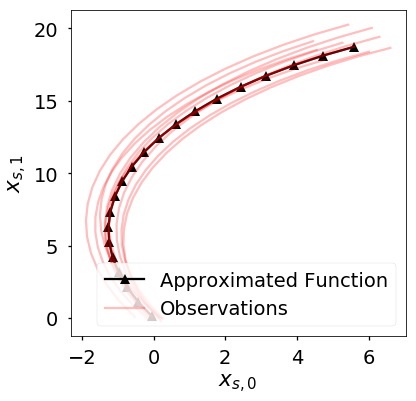

In [8]:
# # train an event model (A Linear Dynamical System)
# e = KerasMultiLayerPerceptron(D=2, optimizer='adam')
# from tqdm import tqdm_notebook

# for x_samp in tqdm_notebook(x, total=n_samples):
#     e.new_cluster()
#     e.update_f0(x_samp[0, :])
#     for ii in range(1, x_samp.shape[0] - 1):
#         _x = x_samp[ii, :]
#         _y = x_samp[ii+1, :]
#         e.update(_x, _y)

        
# # run the model generatively for each event
# n_run = 25 # arbitray duration of the event to simluate
# generative_samples = dict()

# x0 = [np.reshape(e.predict_f0(), (1, 2))]
# for t in range(1, n_run):
#     x_ = np.concatenate(x0)[t-1, :]
# #     x0.append(e.predict_next_generative(x_))
#     x0.append(e.predict_next(x_).reshape(1, 2))
# x0 = np.array(x0).reshape(-1, 2)

#plot the generative sweep
fig = plt.figure(figsize=(6, 6))
h0 = plt.plot(x0[:, 0], x0[:, 1], '^-', color='k', label='Approximated Function')[0]

# plot the original LDS 
for x0  in x:
    plt.plot(x0[:, 0], x0[:, 1], 'r', alpha=0.25)
h1 = plt.plot(x0[:, 0], x0[:, 1], 'r', alpha=0.25, label='Observations')[0]
handles = [h0, h1]


plt.xlabel(r'$x_{s,0}$')
plt.ylabel(r'$x_{s,1}$')
# plt.title('Rotation Traces')
plt.legend(handles=handles, loc='lower right')

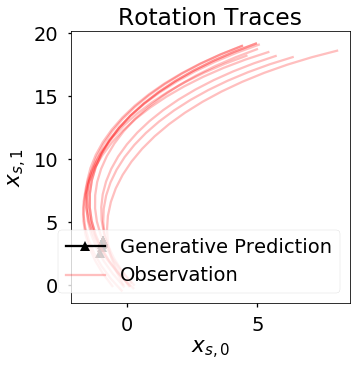

In [12]:
# train an event model (a recurrent neural network)
e = KerasSimpleRNN(D=2, n_epochs=100, t=2, l2_regularization=0.0, optimizer='adam',
                   n_hidden1=2,hidden_act1='tanh')
from tqdm import tqdm_notebook

for x_samp in tqdm_notebook(x, total=n_samples):
    e.new_cluster()
    e.update_f0(x_samp[0, :])
    for ii in range(1, x_samp.shape[0] - 1):
        _x = x_samp[ii, :]
        _y = x_samp[ii+1, :]
        e.update(_x, _y)

# run the model generatively for each event
n_run = 25 # arbitray duration of the event to simluate
generative_samples = dict()

x0 = [np.reshape(e.predict_f0(), (1, 2))]
for t in range(1, n_run):
    x_ = np.concatenate(x0)[t-1, :]
    x0.append(e.predict_next(x_).reshape(1, 2))
x0 = np.array(x0).reshape(-1, 2)

#plot the generative sweep
fig = plt.figure(figsize=(5, 5))
h0 = plt.plot(x0[:, 0], x0[:, 1], '^-', color='k', label='Generative Prediction')[0]

# plot the original LDS 
for x0  in x:
    plt.plot(x0[:, 0], x0[:, 1], 'r', alpha=0.25)
h1 = plt.plot(x0[:, 0], x0[:, 1], 'r', alpha=0.25, label='Observation')[0]
handles = [h0, h1]


plt.xlabel(r'$x_{s,0}$')
plt.ylabel(r'$x_{s,1}$')
plt.title('Rotation Traces')
plt.legend(handles=handles, loc='lower right')

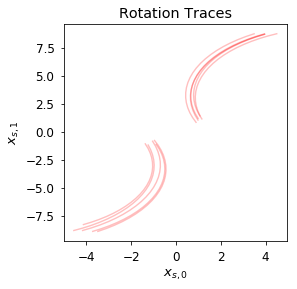

In [32]:
def gen_events():
    A = np.array([[-.5, -2], [2, -.2]])
    A = np.random.randn(2, 2)

    x0 = np.random.rand(2)
    def rotate_matrix(theta):
        theta = theta /(180./np.pi)  # convert to radians
        W = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
        return W

    def lds_update(x, b, W):
        return b + np.matmul(x, W)

    n_samples = 10
    x = []
    fig = plt.figure(figsize=(4, 4))

    thetas = [4., -4.0]
    betas = [[-0.2, 0.5], [0.2, -0.5]]
    x0s = [np.array([1, 1]), np.array([-1, -1])]

    for jj in range(n_samples):
        x0 = []
        x0.append(x0s[jj % 2] + np.random.randn(2)*0.2)
        theta = thetas[jj % 2] + np.random.randn() * 0.5
        b = betas[jj % 2] + np.random.randn(2) * 0.01
    #     b = np.zeros(2)
        for ii in range(20):
            x0.append(lds_update(x0[-1], b, rotate_matrix(4)))

        x0 = np.array(x0)
#         plt.plot(x0[:, 0], x0[:, 1], 'r', alpha=0.25)
        x.append(x0)
    return np.array(x).reshape(-1, 2)

plt.xlabel(r'$x_{s,0}$')
plt.ylabel(r'$x_{s,1}$')
plt.title('Rotation Traces')